In [2]:
import LADPackage
import examples
import shmtools

/Users/eric/repo/shm/shmtools/classification/nlpca.py:27: UserWarning: TensorFlow not available. NLPCA functions will not work. Install TensorFlow: pip install tensorflow
  warnings.warn(


In [3]:
# Import modal analysis data for optimal sensor placement studies.
node_layout, elements, mode_shapes, resp_dof = examples.data.import_modal_osp_shm()

In [3]:
# Import modal analysis data for optimal sensor placement studies.
node_layout, elements, mode_shapes, resp_dof = examples.data.import_modal_osp_shm()

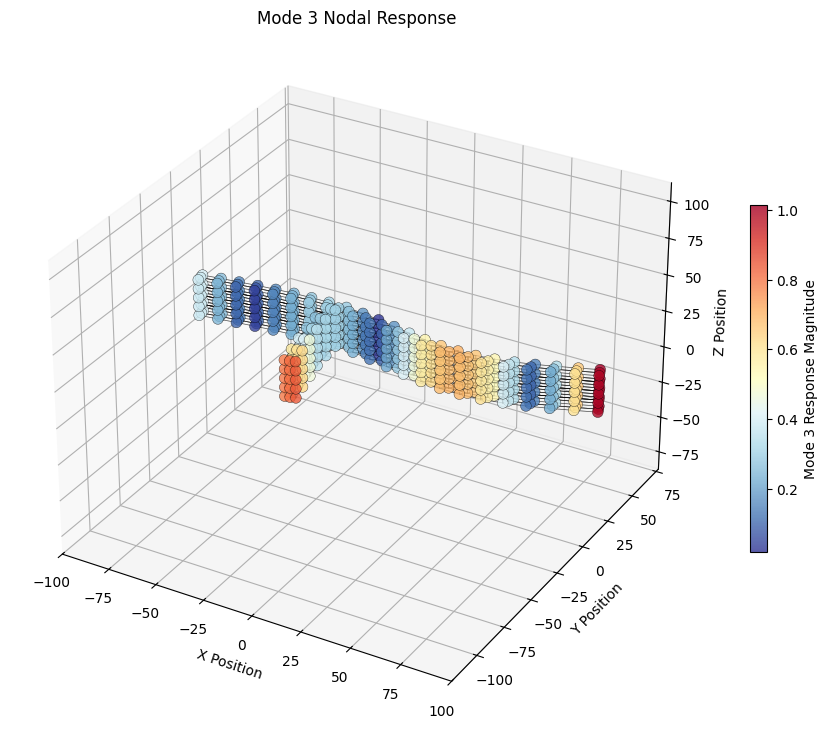

In [4]:
# Plot nodal response with element mesh for a specific mode.
ax = LADPackage.utils.plot_nodal_response(
    geometry_layout=node_layout,  # Geometry Layout (required)
    mode_shapes=mode_shapes,  # Mode Shapes (required)
    resp_dof=resp_dof,  # Response DOF (required)
    elements=elements,  # Elements (required)
    mode_number=3  # Mode Number (required)
)

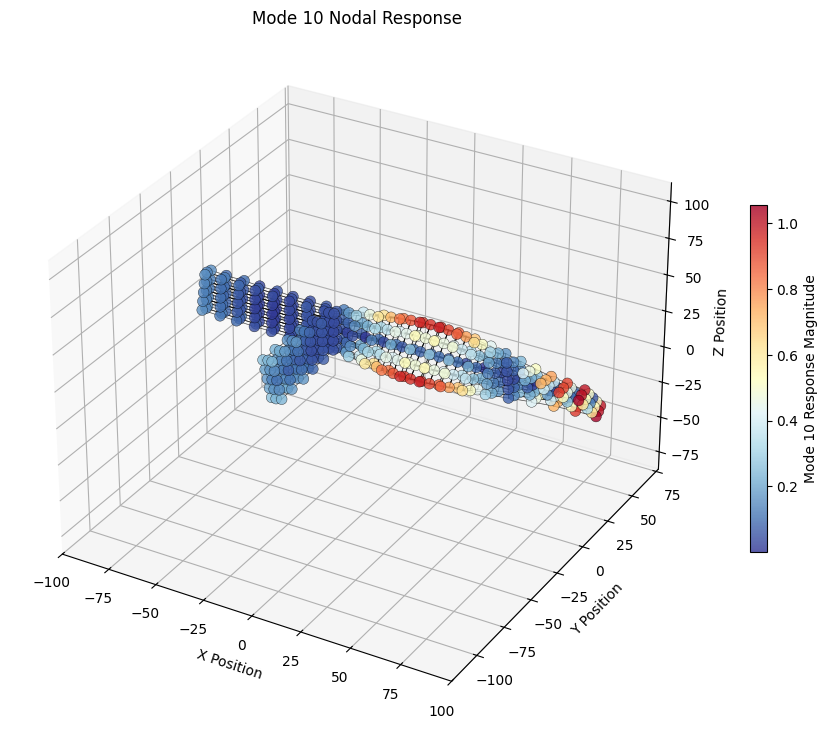

In [5]:
# Plot nodal response with element mesh for a specific mode.
ax = LADPackage.utils.plot_nodal_response(
    geometry_layout=node_layout,  # Geometry Layout (required)
    mode_shapes=mode_shapes,  # Mode Shapes (required)
    resp_dof=resp_dof,  # Response DOF (required)
    elements=elements,  # Elements (required)
    mode_number=10  # Mode Number (required)
)

In [6]:
# Optimal sensor placement using Fisher Information Matrix and Effective Independence method.
op_list, det_q = shmtools.modal.osp_fisher_info_eiv_shm(
    num_sensors=12,  # Number of Sensors (required)
    mode_shapes=mode_shapes,  # Mode Shapes (required)
    cov_matrix=None  # Covariance Matrix (optional)
)

/Users/eric/repo/shm/shmtools/modal/osp.py:285: RuntimeWarning: divide by zero encountered in matmul
  eid = np.diag(phi_c @ q_inv @ phi_c.T)
/Users/eric/repo/shm/shmtools/modal/osp.py:285: RuntimeWarning: overflow encountered in matmul
  eid = np.diag(phi_c @ q_inv @ phi_c.T)
/Users/eric/repo/shm/shmtools/modal/osp.py:285: RuntimeWarning: invalid value encountered in matmul
  eid = np.diag(phi_c @ q_inv @ phi_c.T)


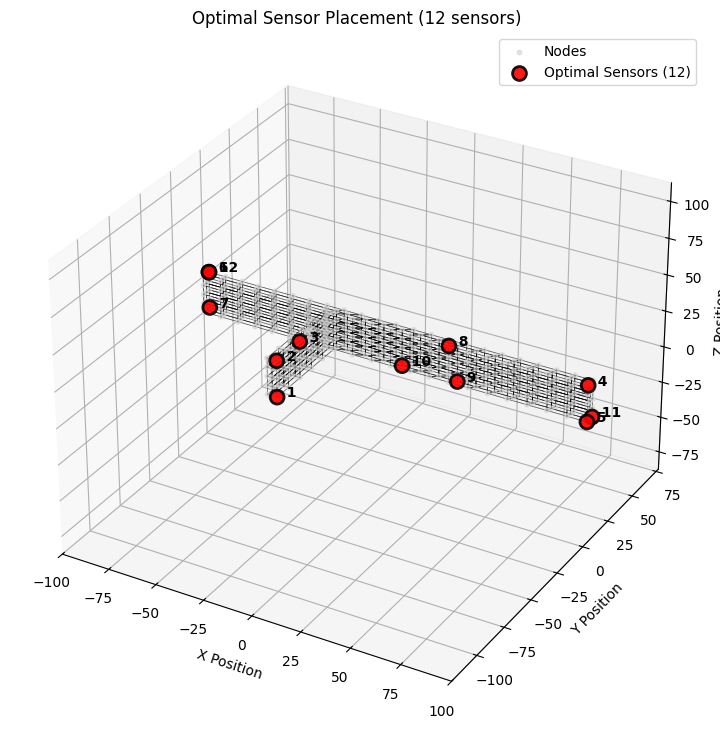

In [7]:
# Plot sensor locations overlaid on structural mesh.
ax1, ax2, sensor_handle = LADPackage.utils.plot_sensors_with_mesh(
    elements=elements,  # Elements (required)
    nodes=node_layout,  # Nodes (required)
    sensor_indices=op_list,  # Sensor Indices (required)
    resp_dof=resp_dof)

In [9]:
# Optimal sensor placement using Maximum Norm method.
op_list = shmtools.modal.osp_max_norm_shm(
    num_sensors=12,  # Number of Sensors (required)
    mode_shapes=mode_shapes,  # Mode Shapes (required)
    weights=range(13,0,-1),  # Weights (required)
    dualing_distance=20,  # Dualing Distance (required)
    resp_dof=resp_dof,  # Response DOF (required)
    geom_layout=node_layout)

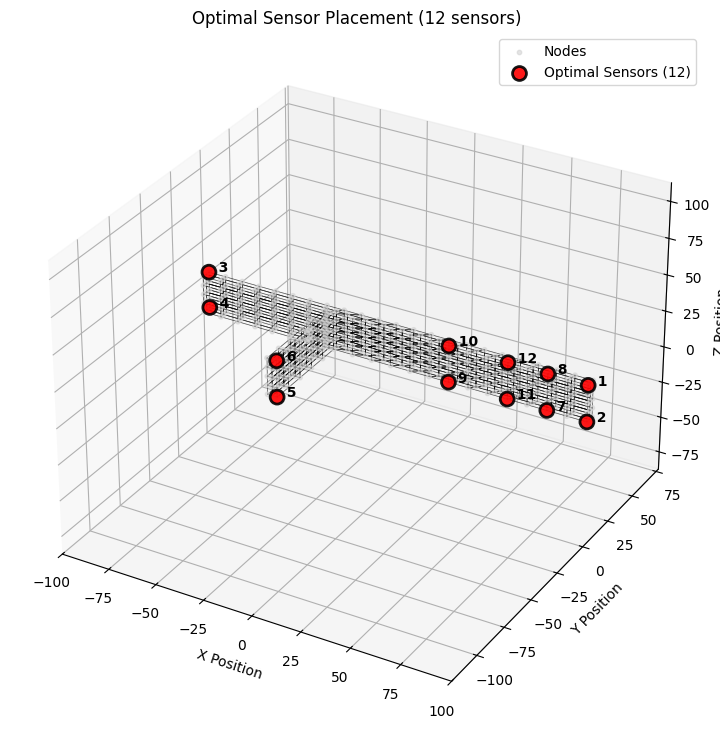

In [10]:
# Plot sensor locations overlaid on structural mesh.
ax1, ax2, sensor_handle = LADPackage.utils.plot_sensors_with_mesh(
    elements=elements,  # Elements (required)
    nodes=node_layout,  # Nodes (required)
    sensor_indices=op_list,  # Sensor Indices (required)
    resp_dof=resp_dof)